In [16]:
#import atlite

import logging
logging.basicConfig(level=logging.INFO)

import geopandas as gpd

import matplotlib.pyplot as plt

#from atlite.gis import shape_availability, ExclusionContainer

import xarray as xr

import numpy as np
import pandas as pd

import requests

import io

import os

from shapely.geometry import Polygon

#from pyhighRES import constants

In [17]:
sharedinputpath = "../../../models/max/special_issue/shared_input/"

In [18]:
europe = gpd.read_file("resources/data/NO-NUTS3.geojson").replace({"UK":"GB","EL":"GR"}).rename(columns={"NUTS_ID":"index"}).loc[:,["index","geometry"]].sort_values("index").set_index('index')#.loc[desired_regions]

/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/atlitefoxold/lib/python3.9/site-packages/geopandas/_vectorized.py:737: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  clipped_geometries[:] = [


<AxesSubplot:>

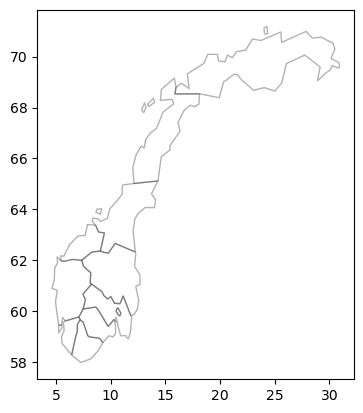

In [6]:
fig, ax = plt.subplots()

gpd.clip(europe,(0,55,35,74)).plot(
    ax=ax,
    facecolor="none", 
    edgecolor="black",
    alpha = 0.3
)

In [11]:
categories = ['Fauna','Natur','Neigh','Sami']
scenarios = ['Low','High']

In [ ]:
gpd.read_file('mo/resources/scenario_exclusions/

/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/atlitefoxold/lib/python3.9/site-packages/geopandas/_vectorized.py:737: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  clipped_geometries[:] = [
/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/atlitefoxold/lib/python3.9/site-packages/geopandas/_vectorized.py:737: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  clipped_geometries[:] = [
/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/atlitefoxold/lib/python3.9/site-packages/geopandas/_vectorized.py:737: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the 

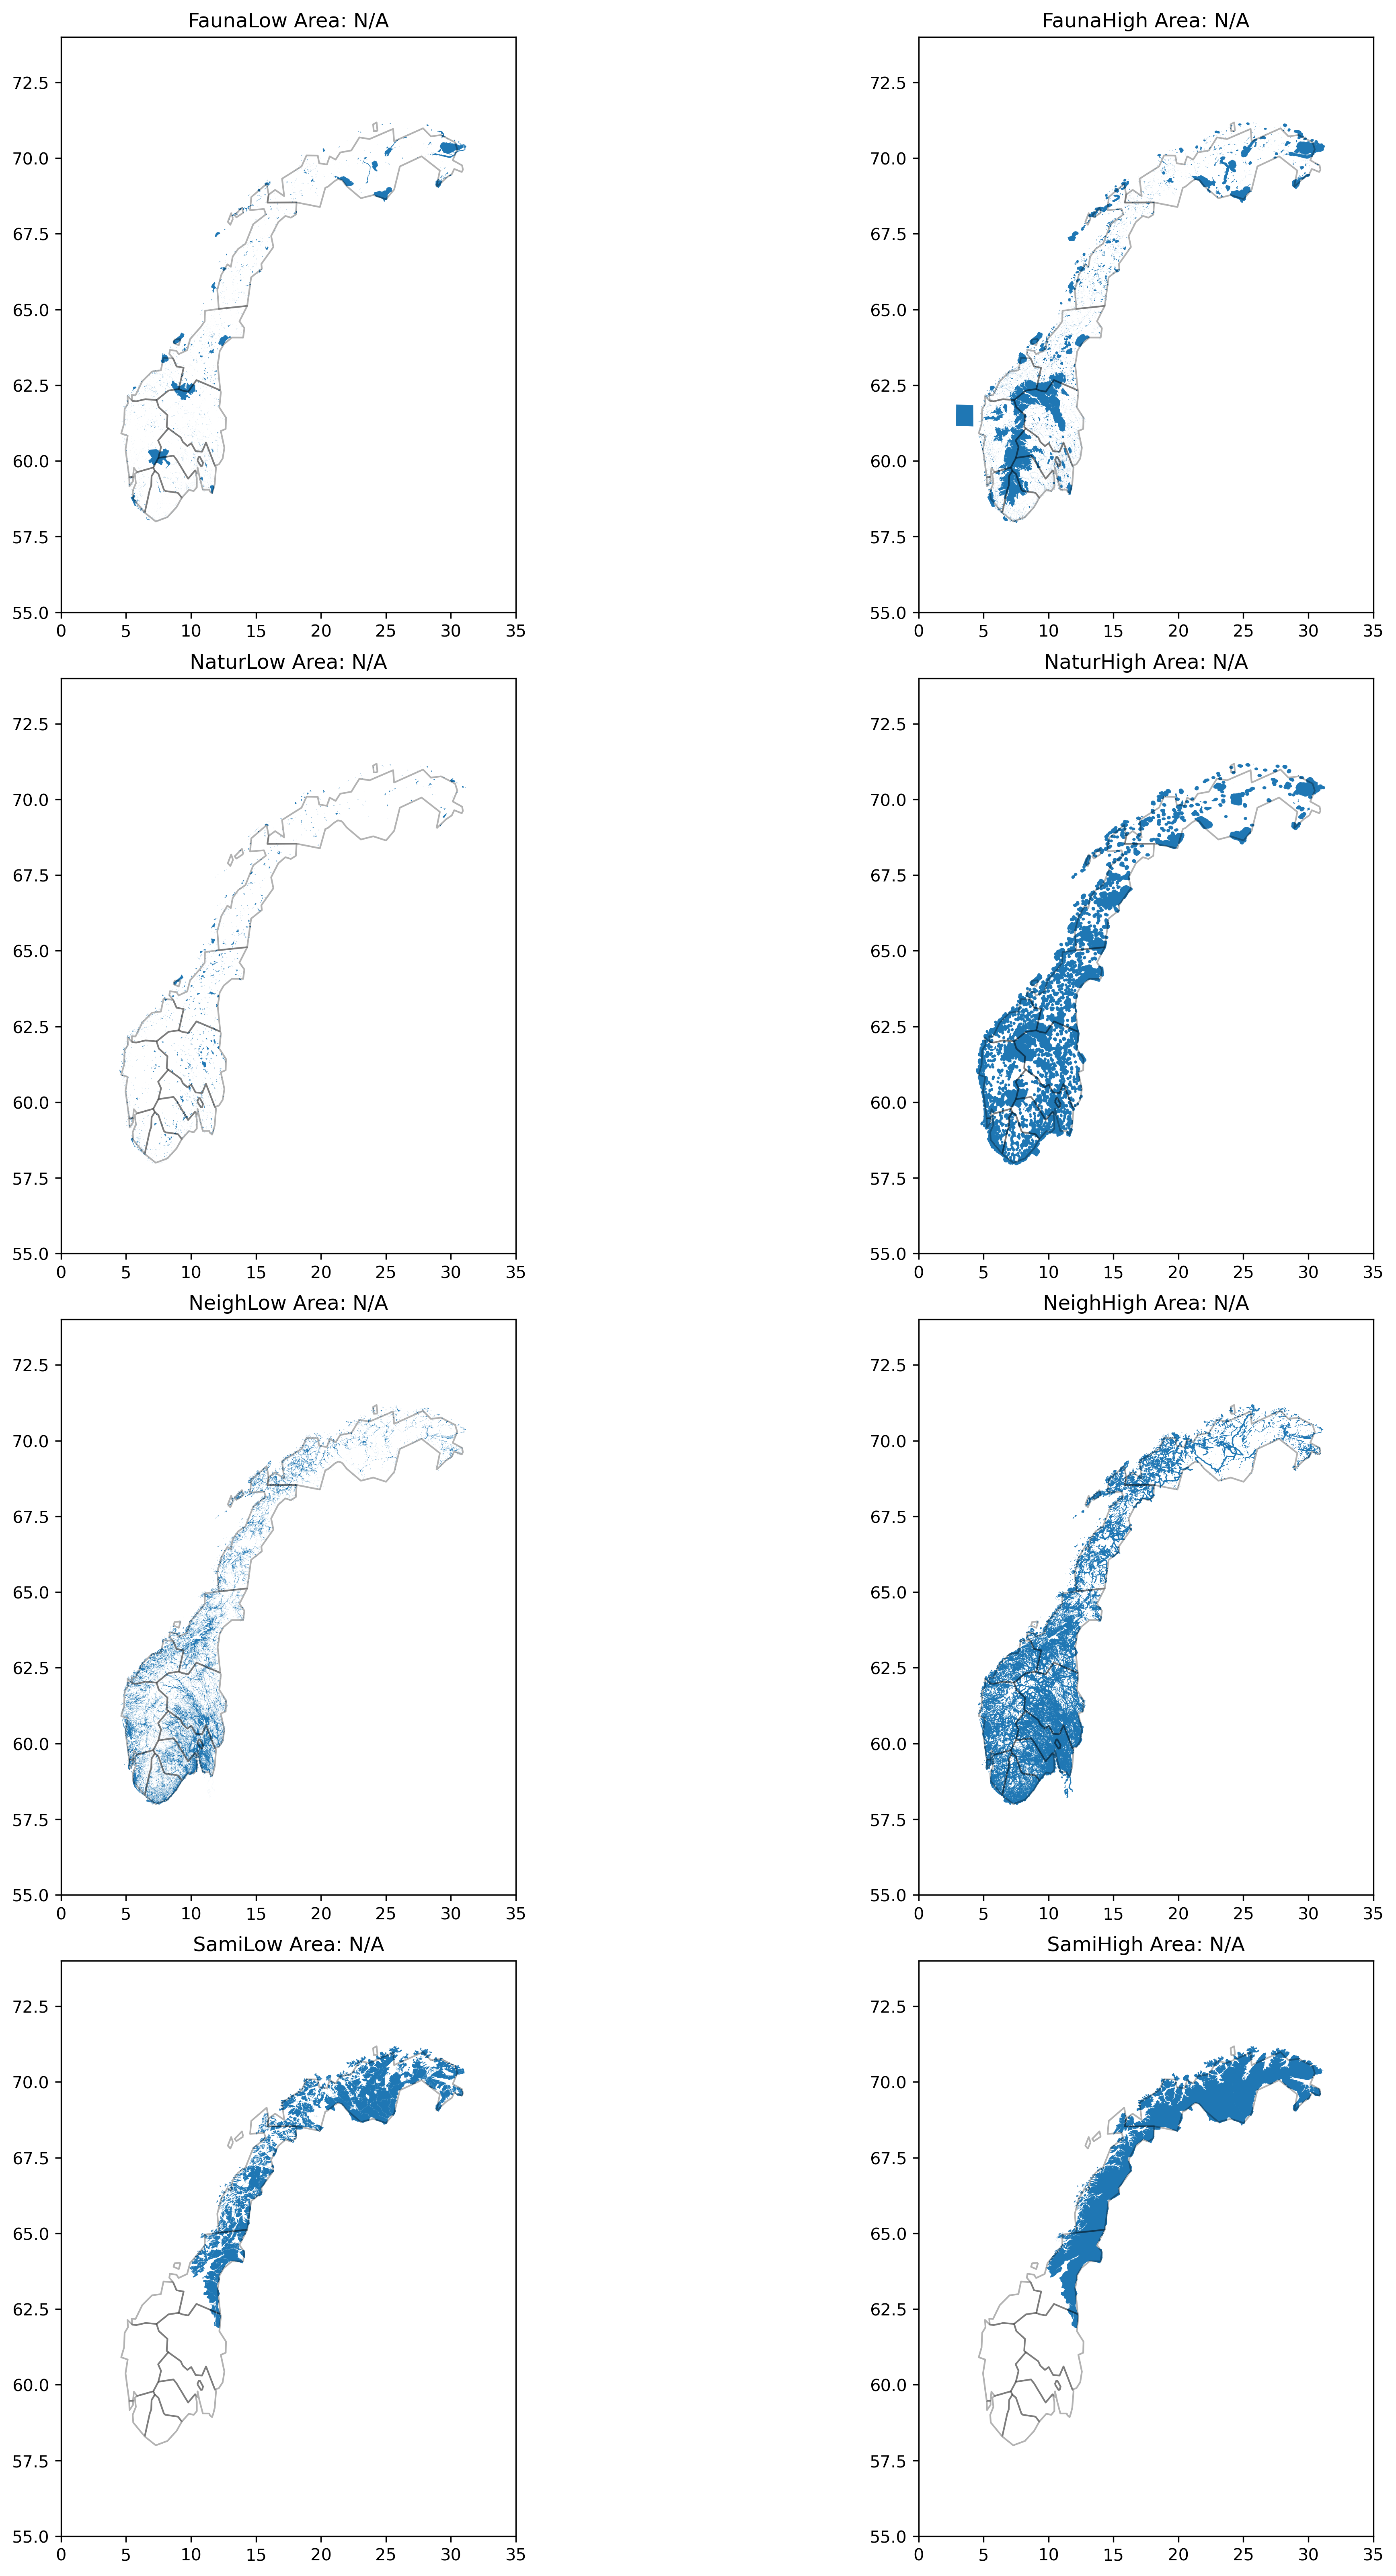

In [12]:
#categories = ['Sami','Natur']
#scenarios = ['Low','Med']
row_nr = 0
column_nr = 0
a = 'N/A'

#norway_area = europe.to_crs('EPSG:3857').area.sum()

fig = plt.figure(figsize=(4*3.54,6*3.54), dpi=300,layout="constrained")

gs = fig.add_gridspec(4,2)

for category in categories:
    for scenario in scenarios:
        ax1 = fig.add_subplot(gs[row_nr,column_nr])
        df = gpd.read_file("mo/resources/scenario_exclusions/" + str(category) + "_" + str(scenario) + "_Exc.zip").to_crs('EPSG:4326')
        df.plot(
            ax=ax1,
        )
        
        #a = df.area.sum()/norway_area
        
        gpd.clip(europe,(0,55,35,74)).plot(
            ax=ax1,
            facecolor="none", 
            edgecolor="black",
            alpha = 0.3
        )
        
        ax1.set_title(str(category) + str(scenario) + ' Area: ' + str(a))
        ax1.set_xlim(0,35)
        ax1.set_ylim(55,74)
        
        column_nr += 1
        if column_nr == 2:
            column_nr = 0
            row_nr += 1
   

In [14]:
pv_low = gpd.read_file("mo/resources/scenario_exclusions/PV_Low_Exc.zip").to_crs('EPSG:4326')

ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fread(6848) failed on DBF file.
ERROR:fiona._env:fre

(55.0, 74.0)

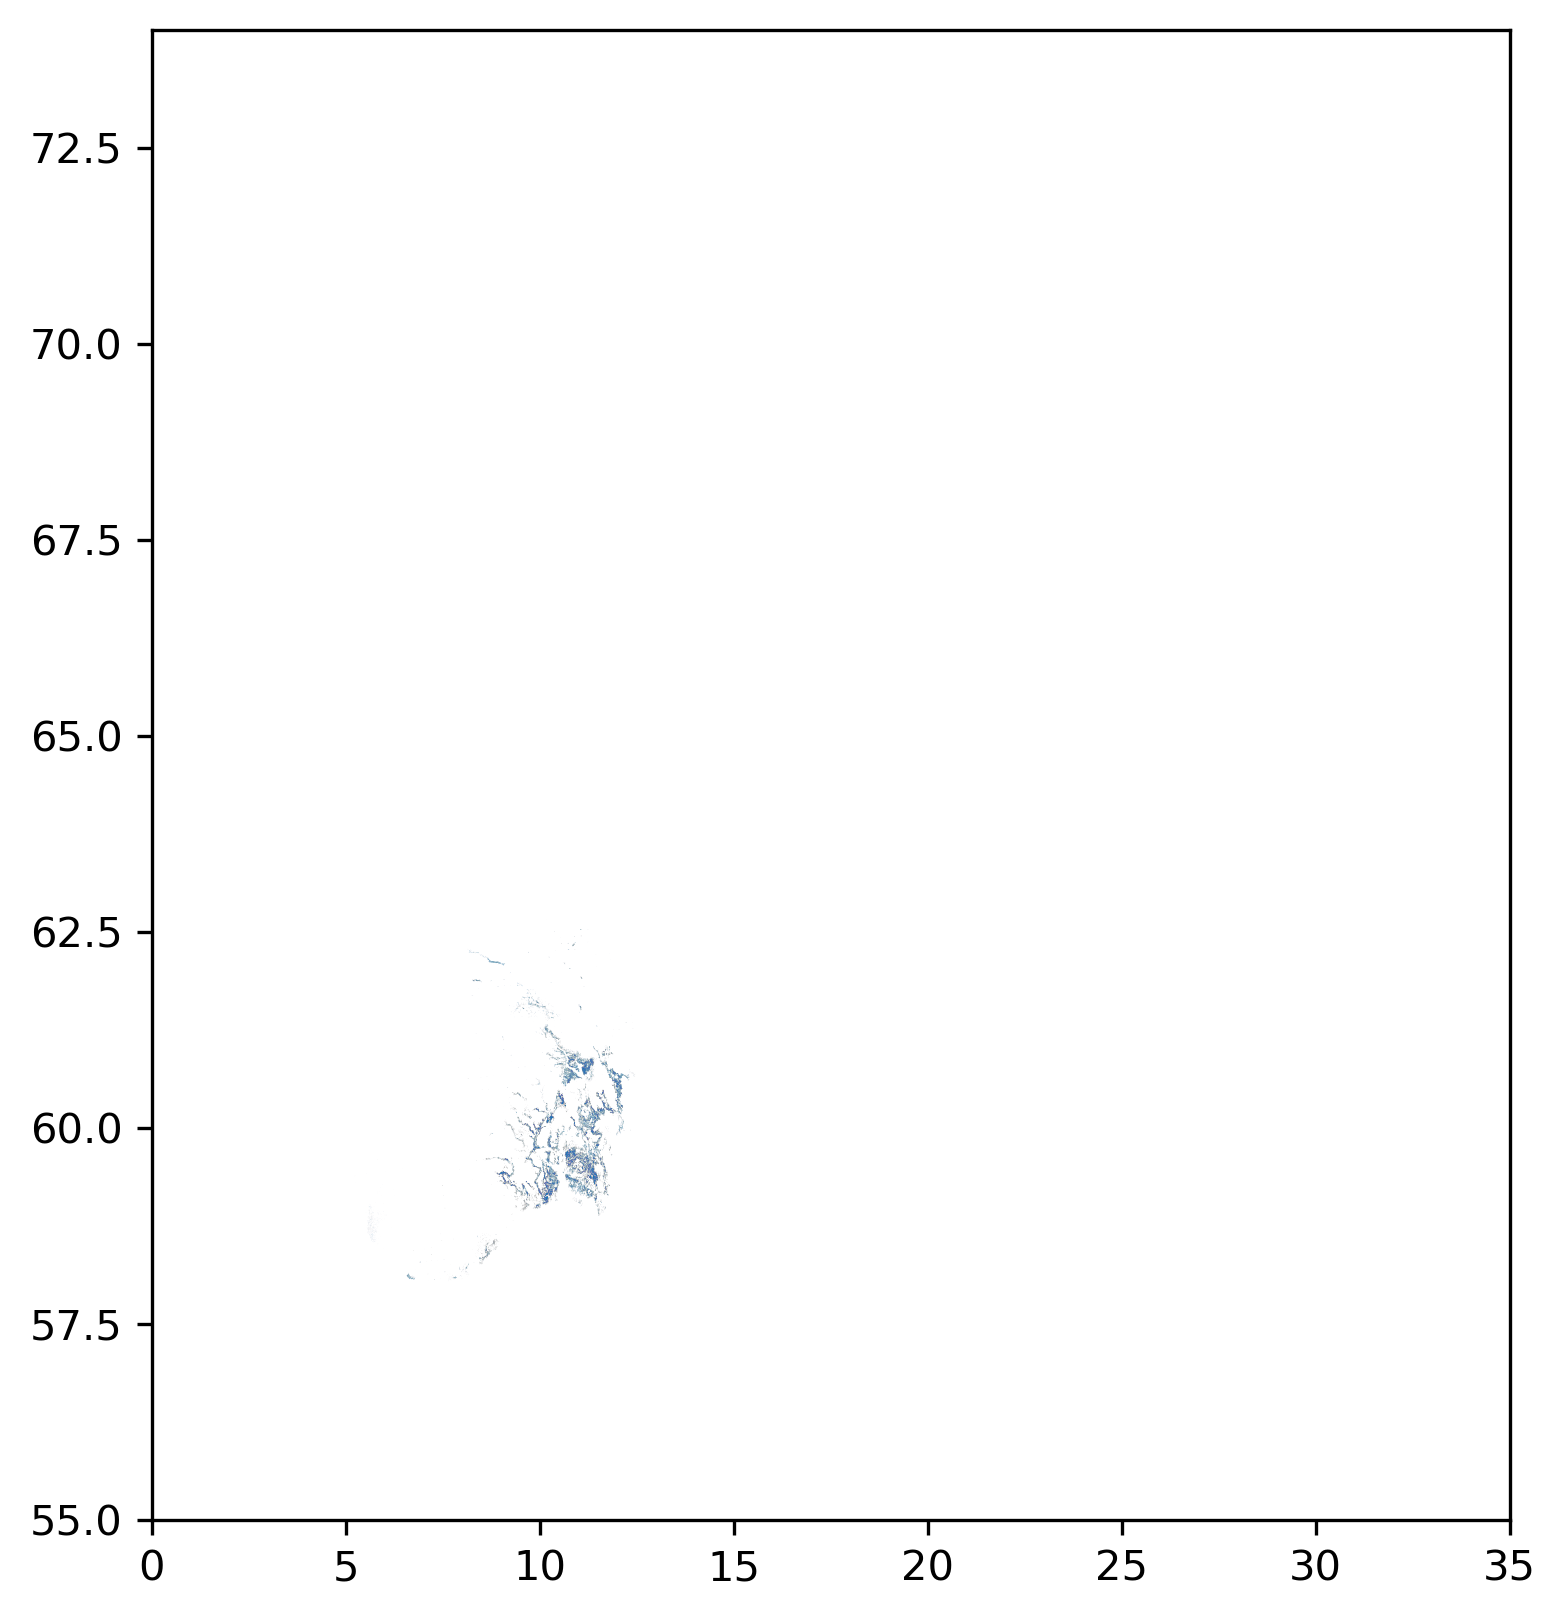

In [15]:
#axs=plt.subplots(1,3)
fig = plt.figure(figsize=(4*3.54,6*3.54), dpi=300,layout="constrained")

gs = fig.add_gridspec(1,3)

ax1 = fig.add_subplot(gs[0,0])
pv_low.plot(
    ax=ax1
)

#ax2 = fig.add_subplot(gs[0,1])
#pv_med.plot(
#    ax=ax2
#)
#
#ax3 = fig.add_subplot(gs[0,2])
#pv_high.plot(
#    ax=ax3
#)

ax1.set_xlim(0,35)
ax1.set_ylim(55,74)

In [21]:
pv_med = gpd.read_file("mo/resources/scenario_exclusions/PV_Medium_Exc.zip").to_crs('EPSG:4326')

ERROR:fiona._env:`/vsizip/mo/resources/scenario_exclusions/PV_Medium_Exc.zip' does not exist in the file system, and is not recognized as a supported dataset name.


DriverError: '/vsizip/mo/resources/scenario_exclusions/PV_Medium_Exc.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [20]:
pv_high = gpd.read_file("resources/data/PV_High_Exc.zip").to_crs('EPSG:4326')

ERROR:fiona._env:`/vsizip/mo/resources/scenario_exclusions/PV_High_Exc.zip' does not exist in the file system, and is not recognized as a supported dataset name.


DriverError: '/vsizip/mo/resources/scenario_exclusions/PV_High_Exc.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [23]:
technical = gpd.read_file("mo/resources/scenario_exclusions/Techn_All_Exc.zip").to_crs('EPSG:4326')
fauna_low = gpd.read_file("mo/resources/scenario_exclusions/Fauna_Low_Exc.zip").to_crs('EPSG:4326')
#neigh_high = gpd.read_file("mo/resources/scenario_exclusions/Neigh_High_Exc.zip").to_crs('EPSG:4326')
#neigh_med = gpd.read_file("mo/resources/scenario_exclusions/Neigh_Med_Exc.zip").to_crs('EPSG:4326')
natur_high = gpd.read_file("mo/resources/scenario_exclusions/Natur_High_Exc.zip").to_crs('EPSG:4326')

In [ ]:
technical.plot(figsize=(10,6))

## Areas

In [ ]:
neigh_med.to_crs('EPSG:3857').plot()

In [ ]:
neigh_med.to_crs('EPSG:3857').area.sum()

In [ ]:
neigh_med.to_crs('EPSG:3857').area.sum()/europe.to_crs('EPSG:3857').area.sum()

In [ ]:
europe.to_crs('EPSG:3857').area.sum()

In [ ]:
technical.to_crs('EPSG:3857').area.sum()

## Overlay

In [ ]:
df_sami_low = gpd.read_file('resources/data/Sami_Low_Exc.zip').to_crs('EPSG:4326')
df_sami_med = gpd.read_file('resources/data/Sami_Med_Exc.zip').to_crs('EPSG:4326')
df_sami_hig = gpd.read_file('resources/data/Sami_High_Exc.zip').to_crs('EPSG:4326')
extra_area = gpd.read_file('resources/data/0000_25833_reindrift-konsesjonsomrade_shp.zip').to_crs('EPSG:4326')
extra_area_buff = extra_area.copy()
extra_area_buff['geometry'] = extra_area_buff['geometry'].buffer(0.05)

In [ ]:
extra_area.plot()
extra_area_buff.plot()

In [ ]:
df_sami_low['savedindex'] = df_sami_low.index
df_sami_med['savedindex'] = df_sami_med.index
df_sami_hig['savedindex'] = df_sami_hig.index

intersecting_low = extra_area.sjoin(df_sami_low, how='inner')['savedindex']
intersecting_med = extra_area.sjoin(df_sami_med, how='inner')['savedindex']
intersecting_hig = extra_area_buff.sjoin(df_sami_hig, how='inner')['savedindex']

df_sami_low_new = df_sami_low[~df_sami_low.savedindex.isin(intersecting_low)]
df_sami_med_new = df_sami_med[~df_sami_med.savedindex.isin(intersecting_med)]
df_sami_hig_new = df_sami_hig[~df_sami_hig.savedindex.isin(intersecting_hig)]

In [ ]:
row_nr = 0
column_nr = 0

fig = plt.figure(figsize=(4*3.54,6*3.54), dpi=300,layout="constrained")

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0,0])
df_sami_low.plot(ax=ax1,label='df_sami_low')
ax1.set_title('df_sami_low')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

ax1 = fig.add_subplot(gs[0,1])
df_sami_low_new.plot(ax=ax1)
ax1.set_title('df_sami_low_new')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

ax1 = fig.add_subplot(gs[1,0])
df_sami_med.plot(ax=ax1)
ax1.set_title('df_sami_med')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

ax1 = fig.add_subplot(gs[1,1])
df_sami_med_new.plot(ax=ax1)
ax1.set_title('df_sami_med_new')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

ax1 = fig.add_subplot(gs[2,0])
df_sami_hig.plot(ax=ax1)
ax1.set_title('df_sami_hig')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

ax1 = fig.add_subplot(gs[2,1])
df_sami_hig_new.plot(ax=ax1)
ax1.set_title('df_sami_hig_new')
ax1.set_xlim(6,33)
ax1.set_ylim(61,72)

plt.savefig('sami_overlays.pdf',bbox_inches='tight')

In [ ]:
sami_list = [df_sami_low_new]

In [ ]:
for item in sami_list:
    item.plot()

In [ ]:
df_sami_low_new.to_file('sami_low_new.geojson',driver='GeoJSON')
df_sami_med_new.to_file('sami_med_new.geojson',driver='GeoJSON')
df_sami_hig_new.to_file('sami_hig_new.geojson',driver='GeoJSON')

In [ ]:
gpd.read_file('sami_hig_new.geojson').plot()